# **Enron Email Analysis Business Report**  

##**Executive Summary**

###Introduction 
The energy trading and utility company Enron, based in Houston, Texas, perpetrated one of the biggest accounting frauds in history. Enron's executives fabricated the company's revenues by using accounting methods, momentarily pushing Enron up to the seventh-largest corporation in the US. After the hoax was revealed, the company quickly collapsed, and in December 2011 it filed for bankruptcy.
###Methodology

A brief explanation of how the study will highlight the patterns and trends in the email dataset from Enron is provided in this section. Include a description of the graph that was used to present and summarise the data from the introduction. An evaluation of the graph is also included in the methods section.

###Results
In this section, the results of the queries and visualisation are displayed. A simple examination of the graphs reveals the outcomes that were covered in the methods section.
###Analysis  
The examination comprises the inquiry, a through explanation, and an analysis of the effects of the finished code for the pattern of Enron email examination, which makes sense of the plot developed. It also showed how Enron's email practices have changed over time.
###Discussion 
For a company of Enron's size, the analysis of the data clearly reveals what would be considered an odd trend and pattern. In the discussion section, the summary of the plot-related findings from the analysis section was broken down.
###Conclusion 
The issues identified in the analysis, discussion, and results are discussed in the report's conclusion, as are some of the issues discussed in the methodology and observations made in the results section. It also provides a brief explanation of the patterns across all of the databases and email analysis.

# **Introduction**
Enron was an energy exchanging organisation situated in Texas. However, fraud led to its bankruptcy in 2022. This led to the public release of the corporation's email dataset. The topics covered in the report include the busiest times of the day, the organisation's top ten emailers, and daily messages. The most active time spans would be covered based on the quantity of messages that were sent each day.

In [1]:
#SQLite3 is imported to view and manipulate the dataset
import sqlite3

In [2]:
#This will download the Enron Email database
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-27 15:41:06--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-27 15:41:07--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  77.5MB/s    in 16s     

2023-05-27 15:41:23 (52.

In [3]:
#Conn is used to create a connection between the code and sqlite for data maipulation 
conn = sqlite3.connect('enron.db')
cur = conn.cursor()

##**Methodology** 
The techniques used to analyse the Enron data are covered in this section. Under this area you will find that the data concerning how to decide the patterns and examples that will additionally separated in the Examination Conversation segment. This section contains the Enron database tables, which will be used to create queries and plots in the Results section, where they will be analysed. The Enron database  contsind the following tables:

1) Employee List

2) Message

3) Recipient In formation

4)Reference Information

####Employee List Table 
This table contains the data of Enron's workers and this data remembers their status being all the last position in the association they held.

In [4]:
# Create the sql command as a string to the creation of a table
sql = """
CREATE TABLE IF NOT EXISTS employeelist(
   userid INT PRIMARY KEY,
   firstname TEXT,
   lastname TEXT,
   email_id REAL,
   email2 REAL, 
   email3 REAL,
   email4 REAL, 
   folder TEXT,
   status TEXT);
"""

#execute the query
cur.execute(sql)
conn.commit()


####Message Table 
The Enron messages tabke records all messages for a given time period and contains information about the messages that were sent.

In [5]:
# create the sql command for the message table 
sql = """
CREATE TABLE IF NOT EXISTS message(
   mid INT PRIMARY KEY,
   sender TEXT,
   date REAL,
   message_id TEXT,
   subject TEXT,
   body TEXT,
   folder TEXT);

"""

#exceute and commit the query 
cur.execute(sql)
conn.commit()

####Recipient Information Table 
The information regarding each email recipient within the organisation can be found in this table.

In [6]:
#create the sql query for the recipient info table 
sql = """
CREATE TABLE IF NOT EXISTS recipientInfo(
   rid TEXT PRIMARY KEY,
   mid TEXT,
   rtype REAL,
   rvalue TEXT);

"""

# execute and commit the query
cur.execute(sql)
conn.commit()

####Reference Information Table 
This table contains data on the beneficiaries of each email that is sent in the organisation.

In [7]:
#create the sql command for the reference info table 
sql = """
CREATE TABLE IF NOT EXISTS referenceInfo(
   rfid TEXT PRIMARY KEY,
   mid TEXT,
   reference REAL);

"""

# execute and commit the query
cur.execute(sql)
conn.commit()

#**Results** 
The tables made in the Methodology section are utilised to make questions and make plots. The plots in this section are as follows:


- Emails sent per day

- Top Ten Emailers 

- Busiest Time Period 







###Emails sent per Day
The organisation's daily email send count is shown in this section. The daily emails are taken from the messages table, and each one includes the date it was sent during Enron's peak.

In [8]:
import pandas as pd 

sql = '''
SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message 
   GROUP BY date_sent
   ORDER BY date_sent;

'''   
#load the data onto a dataframe
emails_df = pd.read_sql_query(sql,conn) 
emails_df
 

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


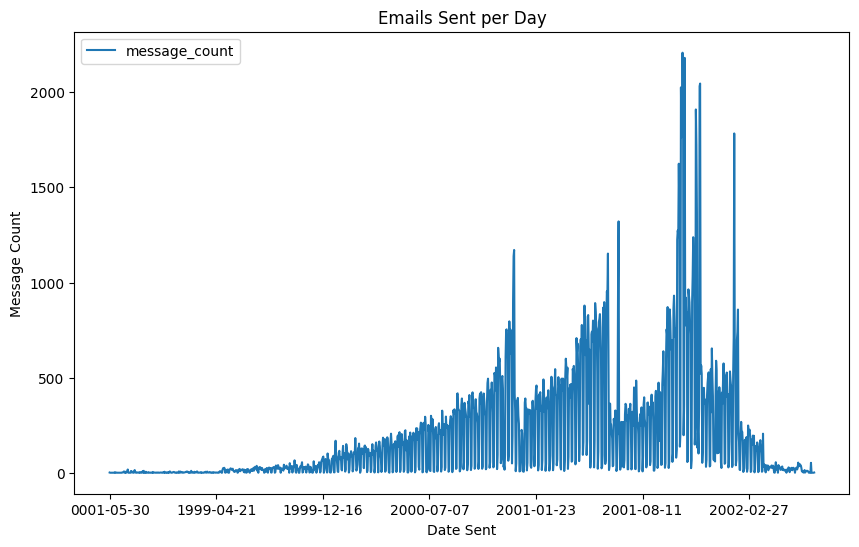

In [9]:
#plot the emails sent per day 
import matplotlib.pyplot as plt
emails_df.plot(title='Emails Sent per Day', x = 'date_sent', y = 'message_count', figsize= (10,6))
plt.ylabel('Message Count')
plt.xlabel('Date Sent')
plt.show()

###Top Ten Emailers in the Organisation 
The number of emails sent by each employee was first determined in order to identify the organisation's top ten emailers. From this dataset, the top ten emailers were then selected.

In [10]:
import pandas as pd 

sql = '''
SELECT sender, count(mid) AS message_count
   FROM message
   GROUP BY sender
   ORDER BY message_count;

'''   
#load the data onto a dataframe
emails_df = pd.read_sql_query(sql,conn) 
emails_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [11]:
#extract the number of the users with the most emails 
top_ten_emailers= emails_df.tail(10)
print(top_ten_emailers)

                              sender  message_count
17517    debra.perlingiere@enron.com           2549
17518      matthew.lenhart@enron.com           2784
17519  enron.announcements@enron.com           2838
17520           no.address@enron.com           3511
17521        chris.germany@enron.com           3686
17522           tana.jones@enron.com           4437
17523      sara.shackleton@enron.com           4797
17524             kay.mann@enron.com           5100
17525           j.kaminski@enron.com           5838
17526        jeff.dasovich@enron.com           6273


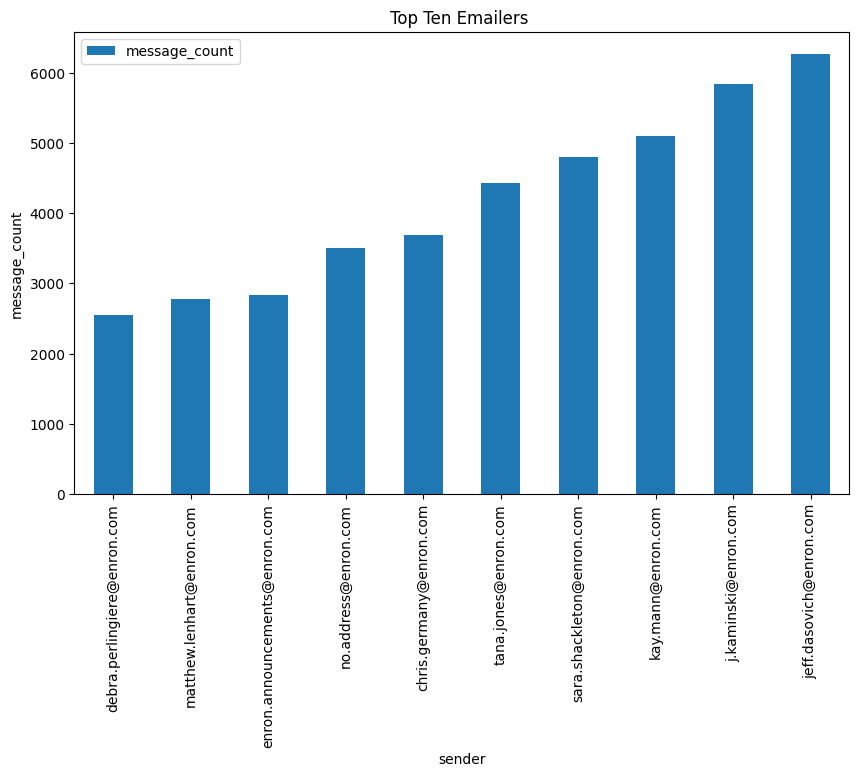

In [12]:
import matplotlib.pyplot as plt

#plot the top ten emailers
top_ten_emailers.plot.bar(title='Top Ten Emailers ', x = 'sender', y = 'message_count', figsize= (10,6))
plt.xlabel('sender')
plt.ylabel('message_count')
plt.show()

#

###The Busiest Time Period 
In order to dtermine which times of day are the busiest, this code makes use of the code for the number of messages sent per day. The information is parted into two primary time spans to consider a more clear investigation. Currently founded on the messages sent each day plot plainly there are times when the email count for a day is extremely high.

####The First Time Frame 

This time period begins at 0001-05-30 and closures at 2000-12-31


In [13]:
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '0001-05-30' AND '2000-12-31'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
first_timeperiod = pd.read_sql_query(sql,conn) 
first_timeperiod

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
772,2000-12-26,77
773,2000-12-27,226
774,2000-12-28,209
775,2000-12-29,119


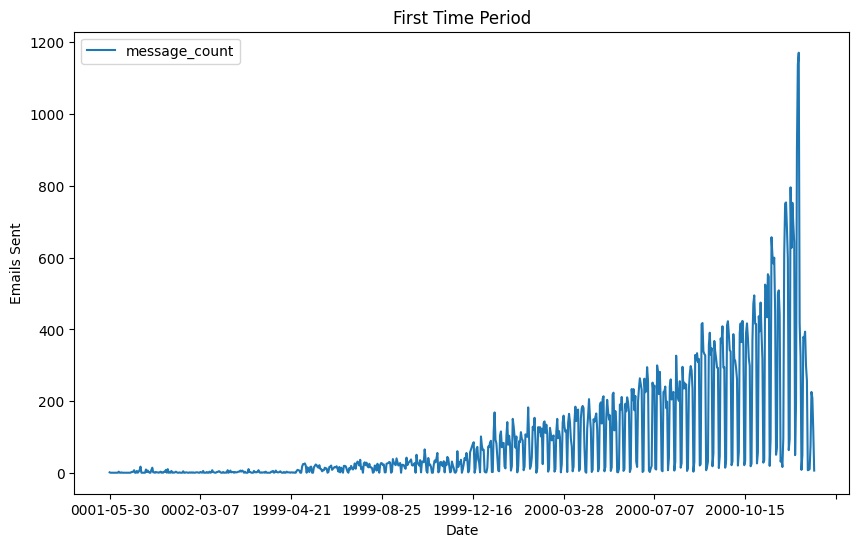

In [14]:
import matplotlib.pyplot as plt
first_timeperiod.plot(title = 'First Time Period', x = 'date_sent', y = 'message_count', figsize = (10,6))
plt.xlabel('Date')
plt.ylabel('Emails Sent')
plt.show()

Based on this plot, it would appear that Enron is becomin busier towards the end of 2000. This could be because the holidays are the busiest times of the year however would not that also be the case for the holidays in 1999.

####The Second Time Period

The time period for this email  begins at 2001-01-01 and closures at 2044-01-04

In [15]:
import pandas as pd

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '2001-01-01' AND '2044-01-04'
 GROUP BY date_sent
 ORDER BY date_sent

 '''
#load the data onto a dataframe
second_timeperiod = pd.read_sql_query(sql,conn) 
second_timeperiod

,date_sent,message_count
0,2001-01-01,46
1,2001-01-02,369
2,2001-01-03,391
3,2001-01-04,341
4,2001-01-05,340
...,...,...
539,2007-02-11,1
540,2020-12-24,1
541,2020-12-29,1
542,2043-12-28,1


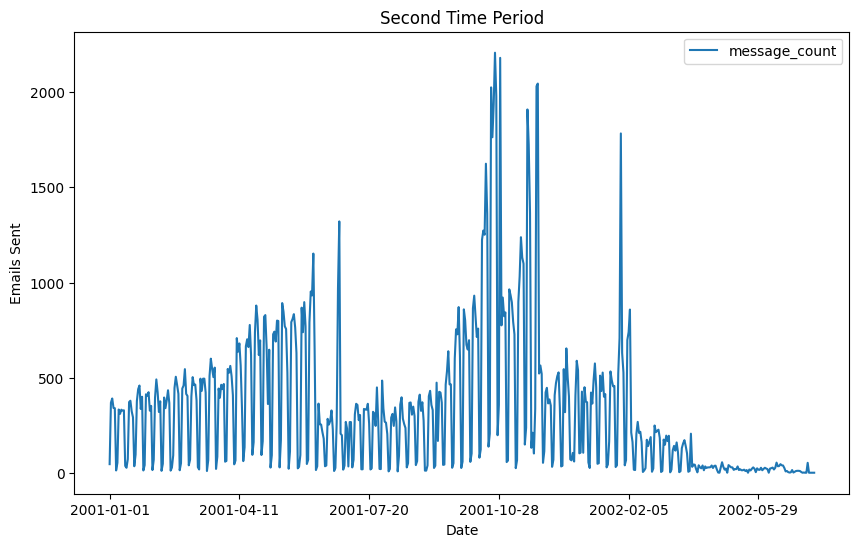

In [16]:
import matplotlib.pyplot as plt
second_timeperiod.plot(title = 'Second Time Period', x = 'date_sent', y = 'message_count', figsize = (10,6))
plt.xlabel('Date')
plt.ylabel('Emails Sent')
plt.show()

It would appear tha this second plot is somewhat comparable to the holiday season in 2000, but it has significantly decreased for the holidays in 2001 and 2002. 

Thus by making double cross casings it is simpler to picture the information and concentrate the most active time periods from every year.

# **Analysis** 

It would be prudent to note that Enron has ensured that tables for recipients and the references utilised in each email are included in the methodology section, which provided a summary of how the tables are to be used in this section. By doing so they can make a connection between every one of the email shippers and the beneficiaries.

Since Enron Email Data already has a lot of users, a split-table for employees and messages sent within the company must be made. The plots for daily messages sent as well as the data frame clearly depict the trends. 

In general, the dataset demonstrates how emails are utilised in Enron. A company like Enron would not be happy with the pattern that this data reveals.


###Emails sent per day 


The plot shows the most active time spans and would be viewed as the peak times of the organisation. Based on the messages sent each day plot, it shows that in the underlying beginning up of the organistion the quantity of messages has gradually expanded throughout the long term and that the messages each day would routinely increase. The plot shows that Enron started sending more emails over time, reaching very high peaks at specific times, and sloping dramatically. 

###Top Ten Emailers 


The main ten emailers of the organisation for the period that was given normal about 6 messages per day for the three years between 2000 to 2002 with the most elevated emailer having sent 6273 messages altogether.

Therefore, it may be interesting to learn more about their position inside the company if they send that many emails daily and have such a large email volume. Since it is assumed that the individual with high email count is a department head, who is normally the busiest in the organisation, it also demonstrated how active Enron is.

###Busiest Email Period 

To enable a much more in-depth investigation of the email data and how the trends evolved over time in Enron, the periods were divided into two independent plots. With fewer employees becoming accustomed to using emails to deliver information to it gradually increasing, the first time frame shows what would appear to be slow and steady incline in email usage at Enron. The second time frame also demonstrates that there is a slow and steady incline at the beginning of the year.

By constrating the two time periods, it will be simpler to see that there was a sharp increase in the number of emails sent each day as the year approached its end in 2000, around October. This behaviour was inconsistent in 2002, even though it peaked earlier that year.

Due to the consistent spikes and slopes in the daily email volume, the emailing patterns in the Enron dataset are also remarkable. Given that Enron may have been coping with their debt being public at that time, it is conserning how erratic their emailing was.

#**Discussion**
Enron's current email dataset reveals signs of fraudulent bahaviour after analysis of the plots for the top ten emailers, emails sent each day, and the two for the busiest time. According to their position, Enron was a sizable business in 2002. While it is usual for sizable businesses to experience hectic holiday seasons, given that Enron traded energy, it makes sense it their email usage was high all year long.

However, one of the top ten emailers has the email address "no.address@enron.com". That seems dubious for a significant company like Enron. Additionally, the plot for the second time period shows what appears to be high between May and June 2001, which is not considered to be one of the peak seasons. The email collection demonstrates trends and patterns that are not typical of most business communications, especially ones with a repertoire similar to Enron's.

# **Conclusion** 
According to the study and debate, Enron's email data contains a number of different elements, including the large volume of emails exchanged within the company and its peak times, which were near the end of the year 2000 and 2001 and in the middle of the year for 2002.

Enron's email statistics demonstrate that their email data exhibits peculiar emailing tendencies due to factors like rapid fall at the beginning of the year and a random surge at he end of the year. Peak times should be constant throughout the year. For a company with about 2000 people included in its employee list table, how the emailing habits suddenly change is not especially usual. It was also mentioned in the analysis part how biased Enron's emailing habits are.

# References 

Benston, George J and Hartgraves, Al L. 2002. "Enron: what happened and what we can learn from it" Journal of Accounting and Public Policy 21(2): 105-127.

  https://doi.org/10.1016/S0278-4254(02)00042-X

Campaign Montor. 2019. " Email Usage Statistics in 2021" CM Group. 

  https://www.campaignmonitor.com/blog/email-marketing/email-usage-statistics-in-2019/

Dofactory. 2022. " SQL WHERE BETWEEN" 

  https://www.dofactory.com/sql/where-between

Geeks for Geeks. 2020. " Get last n records of a Pandas Dataframe" 

  https://www.geeksforgeeks.org/get-last-n-records-of-a-pandas-dataframe/

Hayes, Adam. 2021."Enron" Investopedia. 

  https://www.investopedia.com/terms/e/enron.asp#:~:text=Enron%20was%20an%20energy%20company,and%20bankruptcy%20in%20recent%20history.

Klimt, Bryan and Yang, Yiming. 2004. "Introducing the Enron Corpus" 
  
  https://ceas.cc/papers-2004/168.pdf

Kumar Harish Palaniswamy. 2015. "Exploratory Data Analysis of Enron Emails" 

  https://www.stat.berkeley.edu/~aldous/Research/Ugrad/HarishKumarReport.pdf

Segal Troy. 2021. "Enron Scandal: The fall of a Wall Street Darling" Investopedia.

  https://www.investopedia.com/updates/enron-scandal-summary/ 

Shane Lynn. 2022. " Make Better Bar Charts in Python Using Pandas Plot" 

  https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

Tiwari Shantnu. 2021. " Analysing the Enron Email Corpus" Python for Engineers. 

  https://new.pythonforengineers.com/blog/analysing-the-enron-email-corpus/


W3Schools. 2022. "Matplotlib labels and Titles" 

  https://www.w3schools.com/python/matplotlib_labels.asp

Zach. 2021. " How to add titles to plots in pandas" Statology Study.

  https://www.statology.org/pandas-plot-title/

